## Model Version 3

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import time
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [4]:
df = pd.read_csv("final.df.csv")
df.shape

(200000, 80)

In [5]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)
df.describe()
# need to check (distribution extreme.. check after initial modeling) :  
#    dti, total_rec_late_fee, recoveries, tot_coll_amt, mths_since_rcnt_il, il_util, max_bal_bc, avg_cur_bal,
#    delinq_amnt, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mths_since_recent_revol_delinq, tax_liens

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,fico_range_mean,sub_grade_num,emp_length_num
count,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,14740.615375,14.047924,445.564543,7.432490e+04,18.931042,0.326485,0.694805,38.589950,11.683355,0.226445,1.590229e+04,52.740852,24.888360,12636.221310,2478.097381,2.624044,560.785900,3799.395097,641.761105,610.148025,0.018800,0.005245,230.022100,1.334342e+05,1.050920,2.714855,0.873715,1.915005,19.761910,3.351007e+04,70.205415,1.262295,2.713755,5505.012450,61.995210,3.119424e+04,1.167065,1.669000,2.407435,4.898570,12652.200355,9305.872275,61.043219,0.008975,16.915020,123.496620,177.572560,12.592685,7.572270,1.583020,23.051050,7.020060,41.13807,0.522660,3.702345,4.719860,7.997870,5.726970,0.003425,0.088390,2.271730,94.162227,46.697567,0.142080,0.054800,20540.207830,695.489473,12.822720,5.946410
std,8752.102580,4.954058,262.118049,7.020791e+04,11.675555,0.886051,0.964933,21.663606,5.529451,0.631672,2.076584e+04,24.399791,12.065927,9763.746055,2626.966900,13.561922,1410.832467,6281.502295,89.661439,169.790827,0.152829,0.079168,1775.613015,1.492501e+05,1.189981,2.953508,1.056642,2.005857,25.708152,4.046119e+04,23.289368,1.358994,2.337575,5174.260522,19.674457,3.094635e+04,1.683867,2.932574,2.615008,3.280455,15288.478032,14277.046880,28.251856,0.104616,943.077677,53.847389,94.626771,15.829046,8.539039,1.974375,30.106178,6.059382,21.84772,1.333422,2.268906,2.960616,4.750692,3.267695,0.062636,0.485539,1.894223,8.728537,36.143285,0.386451,0.436312,20559.740281,30.408820,6.669401,3.699005
min,500.000000,5.310000,14.010000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.700000,0.000000,0.000000,0.000000,0.00

### Extreme outlier

In [6]:
df_plot = df
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df_plot['loan_status'])
df_plot['loan_status'] = label_encoder.transform(df_plot['loan_status'])

shape of data(dti>=600) : (10, 80)


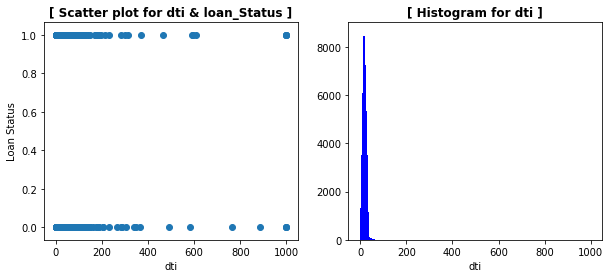

In [7]:
##### "dti" distribution (Outlier) #####
plt.figure(figsize=(10,4))
plt.rcParams['agg.path.chunksize'] = 1000000
plt.subplot(1,2,1)
plt.title('[ Scatter plot for dti & loan_Status ]', fontweight="bold")
plt.scatter('dti', 'loan_status', data=df_plot)
plt.xlabel('dti')
plt.ylabel('Loan Status')

plt.subplot(1,2,2)
plt.hist(df['dti'], bins=1000, color="blue")
plt.title('[ Histogram for dti ]', fontweight="bold")
plt.xlabel('dti')

df.dti.unique().shape
print('shape of data(dti>=600) :', df[df['dti'] >= 600].shape)

shape of data(total_rec_late_fee>=500) : (5, 80)


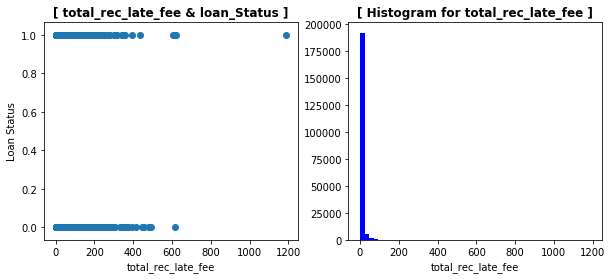

In [8]:
##### "total_rec_late_fee" distribution (Outlier) #####
plt.figure(figsize=(10,4))
plt.rcParams['agg.path.chunksize'] = 1000000
plt.subplot(1,2,1)
plt.title('[ total_rec_late_fee & loan_Status ]', fontweight="bold")
plt.scatter('total_rec_late_fee', 'loan_status', data=df_plot)
plt.xlabel('total_rec_late_fee')
plt.ylabel('Loan Status')

plt.subplot(1,2,2)
plt.hist(df['total_rec_late_fee'], bins=50, color="blue")
plt.title('[ Histogram for total_rec_late_fee ]', fontweight="bold")
plt.xlabel('total_rec_late_fee')

df.dti.unique().shape
print('shape of data(total_rec_late_fee>=500) :', df[df['total_rec_late_fee'] >= 500].shape)

shape of data(tot_coll_amt>=100000) : (6, 80)


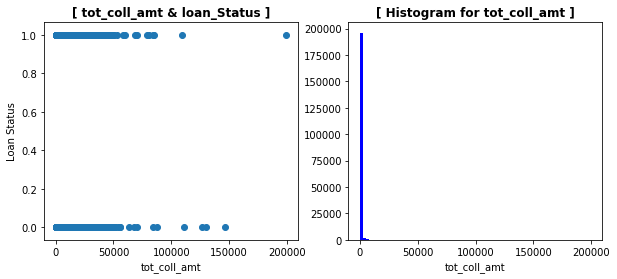

In [9]:
##### "tot_coll_amt" distribution (Outlier) #####
plt.figure(figsize=(10,4))
plt.rcParams['agg.path.chunksize'] = 1000000
plt.subplot(1,2,1)
plt.title('[ tot_coll_amt & loan_Status ]', fontweight="bold")
plt.scatter('tot_coll_amt', 'loan_status', data=df_plot)
plt.xlabel('tot_coll_amt')
plt.ylabel('Loan Status')

plt.subplot(1,2,2)
plt.hist(df['tot_coll_amt'], bins=80, color="blue")
plt.title('[ Histogram for tot_coll_amt ]', fontweight="bold")
plt.xlabel('tot_coll_amt')

df.dti.unique().shape
print('shape of data(tot_coll_amt>=100000) :', df[df['tot_coll_amt'] >= 100000].shape)

In [25]:
# outlier deletion :  dti (>=600, 10 counts)
print('before outlier(dti) removel : ', df.shape)
df = df[df['dti'] < 600]
print('after outlier(dti) removel : ', df.shape)

df = df[df['total_rec_late_fee'] < 500]
print('after outlier(total_rec_late_fee) removel : ', df.shape)

df = df[df['tot_coll_amt'] < 100000]
print('after outlier(tot_coll_amt) removel : ', df.shape)

before outlier(dti) removel :  (200000, 80)
after outlier(dti) removel :  (199990, 80)
after outlier(total_rec_late_fee) removel :  (199985, 80)
after outlier(tot_coll_amt) removel :  (199979, 80)


In [26]:
df = df.drop(['recoveries', 'last_pymnt_amnt','last_fico_range_high','last_fico_range_low','total_pymnt'], axis=1) 

### dummification for categorical variables

In [27]:
print(df.dtypes.value_counts())

int64      51
float64    13
object     11
dtype: int64


In [28]:
x_old = df[df.columns.difference(['loan_status'])]
y = df[['loan_status']]

In [29]:
x = pd.get_dummies(x_old, drop_first=True)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### 1. Logistic Regression

In [33]:
log = LogisticRegression()

log.fit(x_train, y_train)

print('training prediction accuracy :  %.2f' % log.score(x_train, y_train))
print('test prediction accuracy :  %.2f' % log.score(x_test, y_test))
print('** test pred before outlier deletion : ', 0.69)

training prediction accuracy :  0.69
test prediction accuracy :  0.69
** test pred before outlier deletion :  0.69


In [34]:
## same logic (for checking)
lr_log = LogisticRegression()
lr_log.fit(x_train, y_train)
lr_pred = lr_log.predict(x_test)

print('accuracy : %.2f' % accuracy_score(y_test, lr_pred))
print('** test pred before outlier deletion : ', 0.69)

accuracy : 0.69
** test pred before outlier deletion :  0.69


In [35]:
test_pred_prob = lr_log.predict_proba(x_test)
print(roc_auc_score(y_test, test_pred_prob[:,1]))
print('** test pred before outlier deletion : ', 0.747396965817424)

0.7498263373401799
** test pred before outlier deletion :  0.747396965817424


### 2. Random Forest

#### * Before Tuning

In [36]:
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)

accuracy = accuracy_score(y_test, rf_pred)
print('rf accuracy : {0:.4f}' .format(accuracy))
print('** accuracy before outlier deletion : ', 0.6685)

rf accuracy : 0.6722
** accuracy before outlier deletion :  0.6685


#### * Hyper Parameter tuning 

In [37]:
### It takes very long ###

from sklearn.model_selection import GridSearchCV

rf2_clf = RandomForestClassifier(random_state=1)
rf_params = {
    'n_estimators': [50, 100],    
    'max_depth': [6,8,10],
    'min_samples_leaf': [8,12,18],
    'min_samples_split': [8,12,18],
    "random_state": [1]
}

# GridSearchCV
rf_grid_cv = GridSearchCV(rf2_clf, param_grid=rf_params, cv=5)
rf_grid_cv.fit(x_train,y_train)

print('best parameter:\n', rf_grid_cv.best_params_)
print('best prediction accuracy: {0:.4f}'.format(rf_grid_cv.best_score_))

In [38]:
### test with best param + n_estimators increase
rf3_clf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,
                                min_samples_split=8, random_state=1)
rf3_clf.fit(x_train, y_train)
rf3_pred = rf3_clf.predict(x_test)

print('rf3 accuracy : {0:.4f}' .format(accuracy_score(y_test, rf3_pred)))
print('** accuracy before outlier deletion : ', 0.7011)

rf3 accuracy : 0.7005
** accuracy before outlier deletion :  0.7011


debt_settlement_flag_Y    0.183825
sub_grade_num             0.136014
int_rate                  0.135239
total_rec_late_fee        0.095256
term_ 60 months           0.060878
fico_range_mean           0.026908
grade_B                   0.026790
grade_E                   0.022606
total_rec_int             0.022093
dti                       0.020614
grade_D                   0.016691
avg_cur_bal               0.015822
loan_amnt                 0.013737
grade_C                   0.012729
bc_open_to_buy            0.012653
installment               0.012399
tot_cur_bal               0.010602
acc_open_past_24mths      0.010364
grade_F                   0.009606
annual_inc                0.008628
dtype: float64


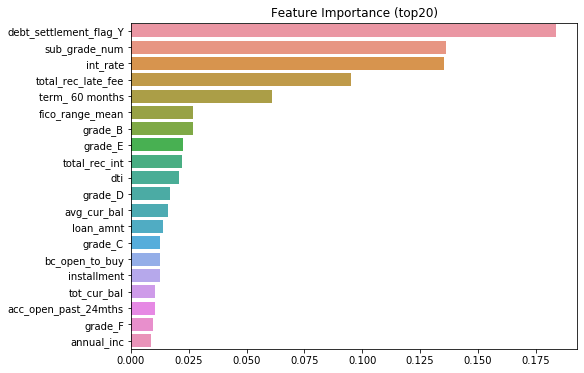

In [39]:
feature_imp = rf3_clf.feature_importances_
feature_imp = pd.Series(feature_imp, index=x_train.columns)
feature_top20 = feature_imp.sort_values(ascending=False)[:20]
print(feature_top20)

plt.figure(figsize=(8,6))
plt.title('Feature Importance (top20)')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()

### 3. GBM

#### * Before Tuning

In [40]:
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('gbm accuracy : {0:.4f}'.format(accuracy))
print('gbm running time : {0:.1f} seconds '.format(time.time()-start_time))
print('** accuracy before outlier deletion : ', 0.6685)

gbm accuracy : 0.6722
gbm running time : 137.4 seconds 
** accuracy before outlier deletion :  0.6685


#### * Hyper Parameter tuning

In [41]:
gb2_clf = GradientBoostingClassifier(random_state=1)
gb_params = {
    'n_estimators': [100,500],
    'learning_rate': [0.05, 0.1]
}

gb_grid_cv = GridSearchCV(gb2_clf, param_grid=gb_params, cv=10, verbose=1)
gb_grid_cv.fit(x_train, y_train)

print('best parameter:\n', gb_grid_cv.best_params_)
print('best prediction accuracy: {0:.4f}'.format(gb_grid_cv.best_score_))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 168.4min finished


best parameter:
 {'learning_rate': 0.1, 'n_estimators': 500}
best prediction accuracy: 0.7370


In [42]:
### test with best param 
gb3_pred = gb_grid_cv.best_estimator_.predict(x_test)
gb3_accuracy = accuracy_score(y_test, gb3_pred)

print('GBM accuracy(After tuning) : {0:.4f}' .format(gb3_accuracy))

GBM accuracy(After tuning) : 0.7379


sub_grade_num             0.306095
debt_settlement_flag_Y    0.211962
total_rec_int             0.120541
total_rec_late_fee        0.086313
term_ 60 months           0.049026
installment               0.034923
loan_amnt                 0.034915
int_rate                  0.022657
dti                       0.014608
avg_cur_bal               0.014185
annual_inc                0.009855
num_rev_tl_bal_gt_0       0.006477
home_ownership_RENT       0.005752
fico_range_mean           0.005744
mo_sin_old_rev_tl_op      0.005398
acc_open_past_24mths      0.004965
mort_acc                  0.004167
open_rv_24m               0.002852
total_bc_limit            0.002833
total_rev_hi_lim          0.002816
dtype: float64


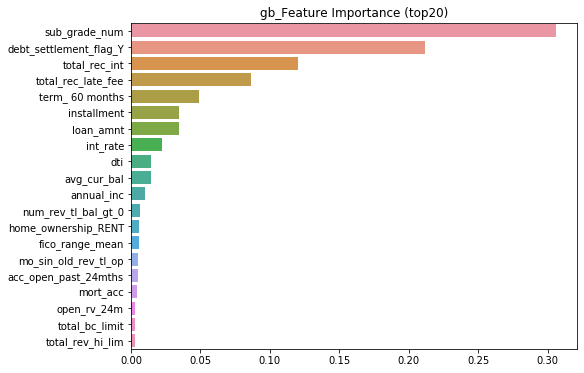

In [76]:
gb_feature_imp = gb_grid_cv.best_estimator_.feature_importances_
gb_feature_imp = pd.Series(gb_feature_imp, index=x_train.columns)
gb_feature_top20 = gb_feature_imp.sort_values(ascending=False)[:20]
print(gb_feature_top20)

plt.figure(figsize=(8,6))
plt.title('gb_Feature Importance (top20)')
sns.barplot(x=gb_feature_top20, y=gb_feature_top20.index)
plt.show()

### 4. XGBoost

In [44]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
y_train_xgb = label_encoder.transform(y_train)

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_test)
y_test_xgb = label_encoder.transform(y_test)

In [45]:
dtrain = xgb.DMatrix(data=x_train, label=y_train_xgb)
dtest = xgb.DMatrix(data=x_test, label=y_test_xgb)

In [46]:
xgb_params = {'max_depth':3, 'eta':0.1, 'objective':'binary:logistic', 'eval_metric':'logloss', 
              'early_stoppings':100}
num_rounds = 400

In [47]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params = xgb_params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)


[0]	train-logloss:0.676491	eval-logloss:0.67652
[1]	train-logloss:0.66268	eval-logloss:0.662951
[2]	train-logloss:0.650993	eval-logloss:0.651298
[3]	train-logloss:0.641154	eval-logloss:0.641568
[4]	train-logloss:0.632793	eval-logloss:0.633238
[5]	train-logloss:0.625525	eval-logloss:0.626079
[6]	train-logloss:0.619232	eval-logloss:0.619867
[7]	train-logloss:0.613797	eval-logloss:0.614576
[8]	train-logloss:0.609104	eval-logloss:0.609926
[9]	train-logloss:0.604925	eval-logloss:0.605837
[10]	train-logloss:0.60126	eval-logloss:0.602291
[11]	train-logloss:0.598075	eval-logloss:0.599186
[12]	train-logloss:0.595216	eval-logloss:0.596393
[13]	train-logloss:0.592318	eval-logloss:0.593564
[14]	train-logloss:0.589999	eval-logloss:0.59125
[15]	train-logloss:0.587989	eval-logloss:0.589319
[16]	train-logloss:0.586	eval-logloss:0.587374
[17]	train-logloss:0.583892	eval-logloss:0.585371
[18]	train-logloss:0.582324	eval-logloss:0.583885
[19]	train-logloss:0.580833	eval-logloss:0.582405
[20]	train-loglos

[164]	train-logloss:0.524265	eval-logloss:0.529532
[165]	train-logloss:0.52399	eval-logloss:0.529272
[166]	train-logloss:0.523815	eval-logloss:0.529125
[167]	train-logloss:0.523709	eval-logloss:0.529045
[168]	train-logloss:0.523566	eval-logloss:0.528935
[169]	train-logloss:0.523374	eval-logloss:0.52878
[170]	train-logloss:0.523275	eval-logloss:0.528717
[171]	train-logloss:0.523166	eval-logloss:0.528627
[172]	train-logloss:0.523105	eval-logloss:0.528574
[173]	train-logloss:0.522826	eval-logloss:0.528306
[174]	train-logloss:0.522706	eval-logloss:0.528194
[175]	train-logloss:0.522628	eval-logloss:0.52814
[176]	train-logloss:0.522514	eval-logloss:0.52805
[177]	train-logloss:0.522418	eval-logloss:0.528
[178]	train-logloss:0.52231	eval-logloss:0.527892
[179]	train-logloss:0.522165	eval-logloss:0.527771
[180]	train-logloss:0.52211	eval-logloss:0.52773
[181]	train-logloss:0.521998	eval-logloss:0.52764
[182]	train-logloss:0.521899	eval-logloss:0.527571
[183]	train-logloss:0.52185	eval-logloss:0

[326]	train-logloss:0.509341	eval-logloss:0.517949
[327]	train-logloss:0.509193	eval-logloss:0.517859
[328]	train-logloss:0.509044	eval-logloss:0.517723
[329]	train-logloss:0.508926	eval-logloss:0.517626
[330]	train-logloss:0.508852	eval-logloss:0.517572
[331]	train-logloss:0.508754	eval-logloss:0.517483
[332]	train-logloss:0.508703	eval-logloss:0.517461
[333]	train-logloss:0.508654	eval-logloss:0.517437
[334]	train-logloss:0.508591	eval-logloss:0.517404
[335]	train-logloss:0.508554	eval-logloss:0.5174
[336]	train-logloss:0.508507	eval-logloss:0.517377
[337]	train-logloss:0.50843	eval-logloss:0.517329
[338]	train-logloss:0.508383	eval-logloss:0.517329
[339]	train-logloss:0.508332	eval-logloss:0.517281
[340]	train-logloss:0.508277	eval-logloss:0.517249
[341]	train-logloss:0.508231	eval-logloss:0.517231
[342]	train-logloss:0.508183	eval-logloss:0.517208
[343]	train-logloss:0.508163	eval-logloss:0.517212
[344]	train-logloss:0.508122	eval-logloss:0.517188
[345]	train-logloss:0.508087	eval-

In [48]:
pred_probs = xgb_model.predict(dtest)
xgb_preds = [1 if x>0.5 else 0 for x in pred_probs]


In [49]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test_xgb, pred)
    accuracy = accuracy_score(y_test_xgb , pred)
    precision = precision_score(y_test_xgb , pred)
    recall = recall_score(y_test_xgb , pred)
    print('confusion matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}'.format(accuracy , precision ,recall))

In [50]:
get_clf_eval(y_test_xgb, xgb_preds)
print('** accuracy before outlier deletion : ', 'Accuracy: 0.7345, Precision: 0.7293, Recall: 0.8045')

confusion matrix
[[12146  6455]
 [ 4141 17254]]
Accuracy: 0.7351, Precision: 0.7277, Recall: 0.8065
** accuracy before outlier deletion :  Accuracy: 0.7345, Precision: 0.7293, Recall: 0.8045


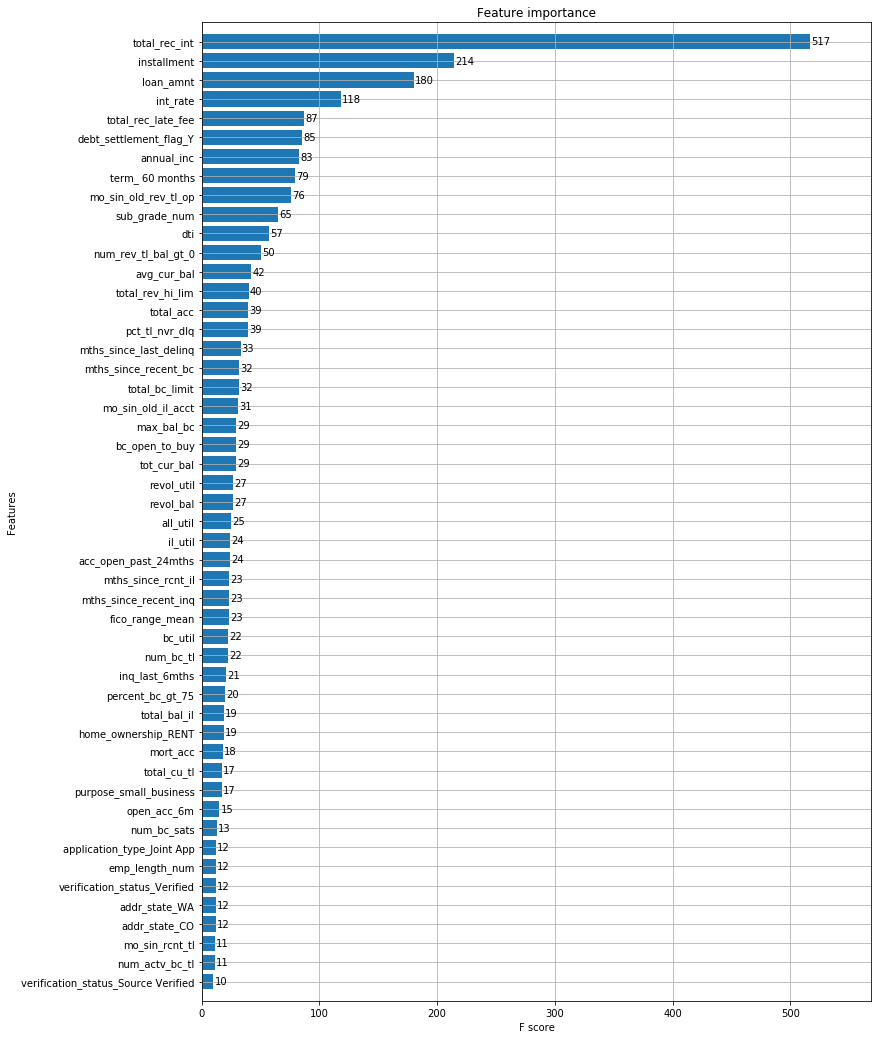

In [86]:
fig, ax = plt.subplots(figsize=(12,18))
plt.title('XGB_Feature Importance (top50)')
xgb.plot_importance(xgb_model, max_num_features=50, height=0.8, ax=ax)
plt.show()